# Técnicas de Pré-processamento para OCR

# Importando as bibliotecas

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Para ler aquivos pdfs

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 2s (123 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123576 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install pdf2image

#INSIRA AQUI O DOCUMENTO PDF

In [ ]:
from pdf2image import convert_from_path
#Upe o arquivo e copie seu caminho aqui
pages = convert_from_path('/content/MiniSat.pdf.crdownload')

for i in range(len(pages)):

    pages[i].save('page'+ str(i) +'.jpg', 'JPEG')

#CASO UPE ARQUIVOS DO DRIVE

In [ ]:
#caso vá upar imagem do drive, use isso
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Detecção de textos

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,903 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import pytesseract

#ARQUIVOS EM PORTUGUÊS

In [ ]:
#Compile isso caso use artigos em português
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2024-07-11 14:56:57--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-07-11 14:56:57--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-07-11 14:56:57--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awa

#ARTIGOS EM INGLÊS

In [ ]:
#Compile caso vá usar artigos em inglês
!mkdir tessdata
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2024-07-16 13:47:03--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata [following]
--2024-07-16 13:47:04--  https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata [following]
--2024-07-16 13:47:04--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, a

# bote a imagem aqui


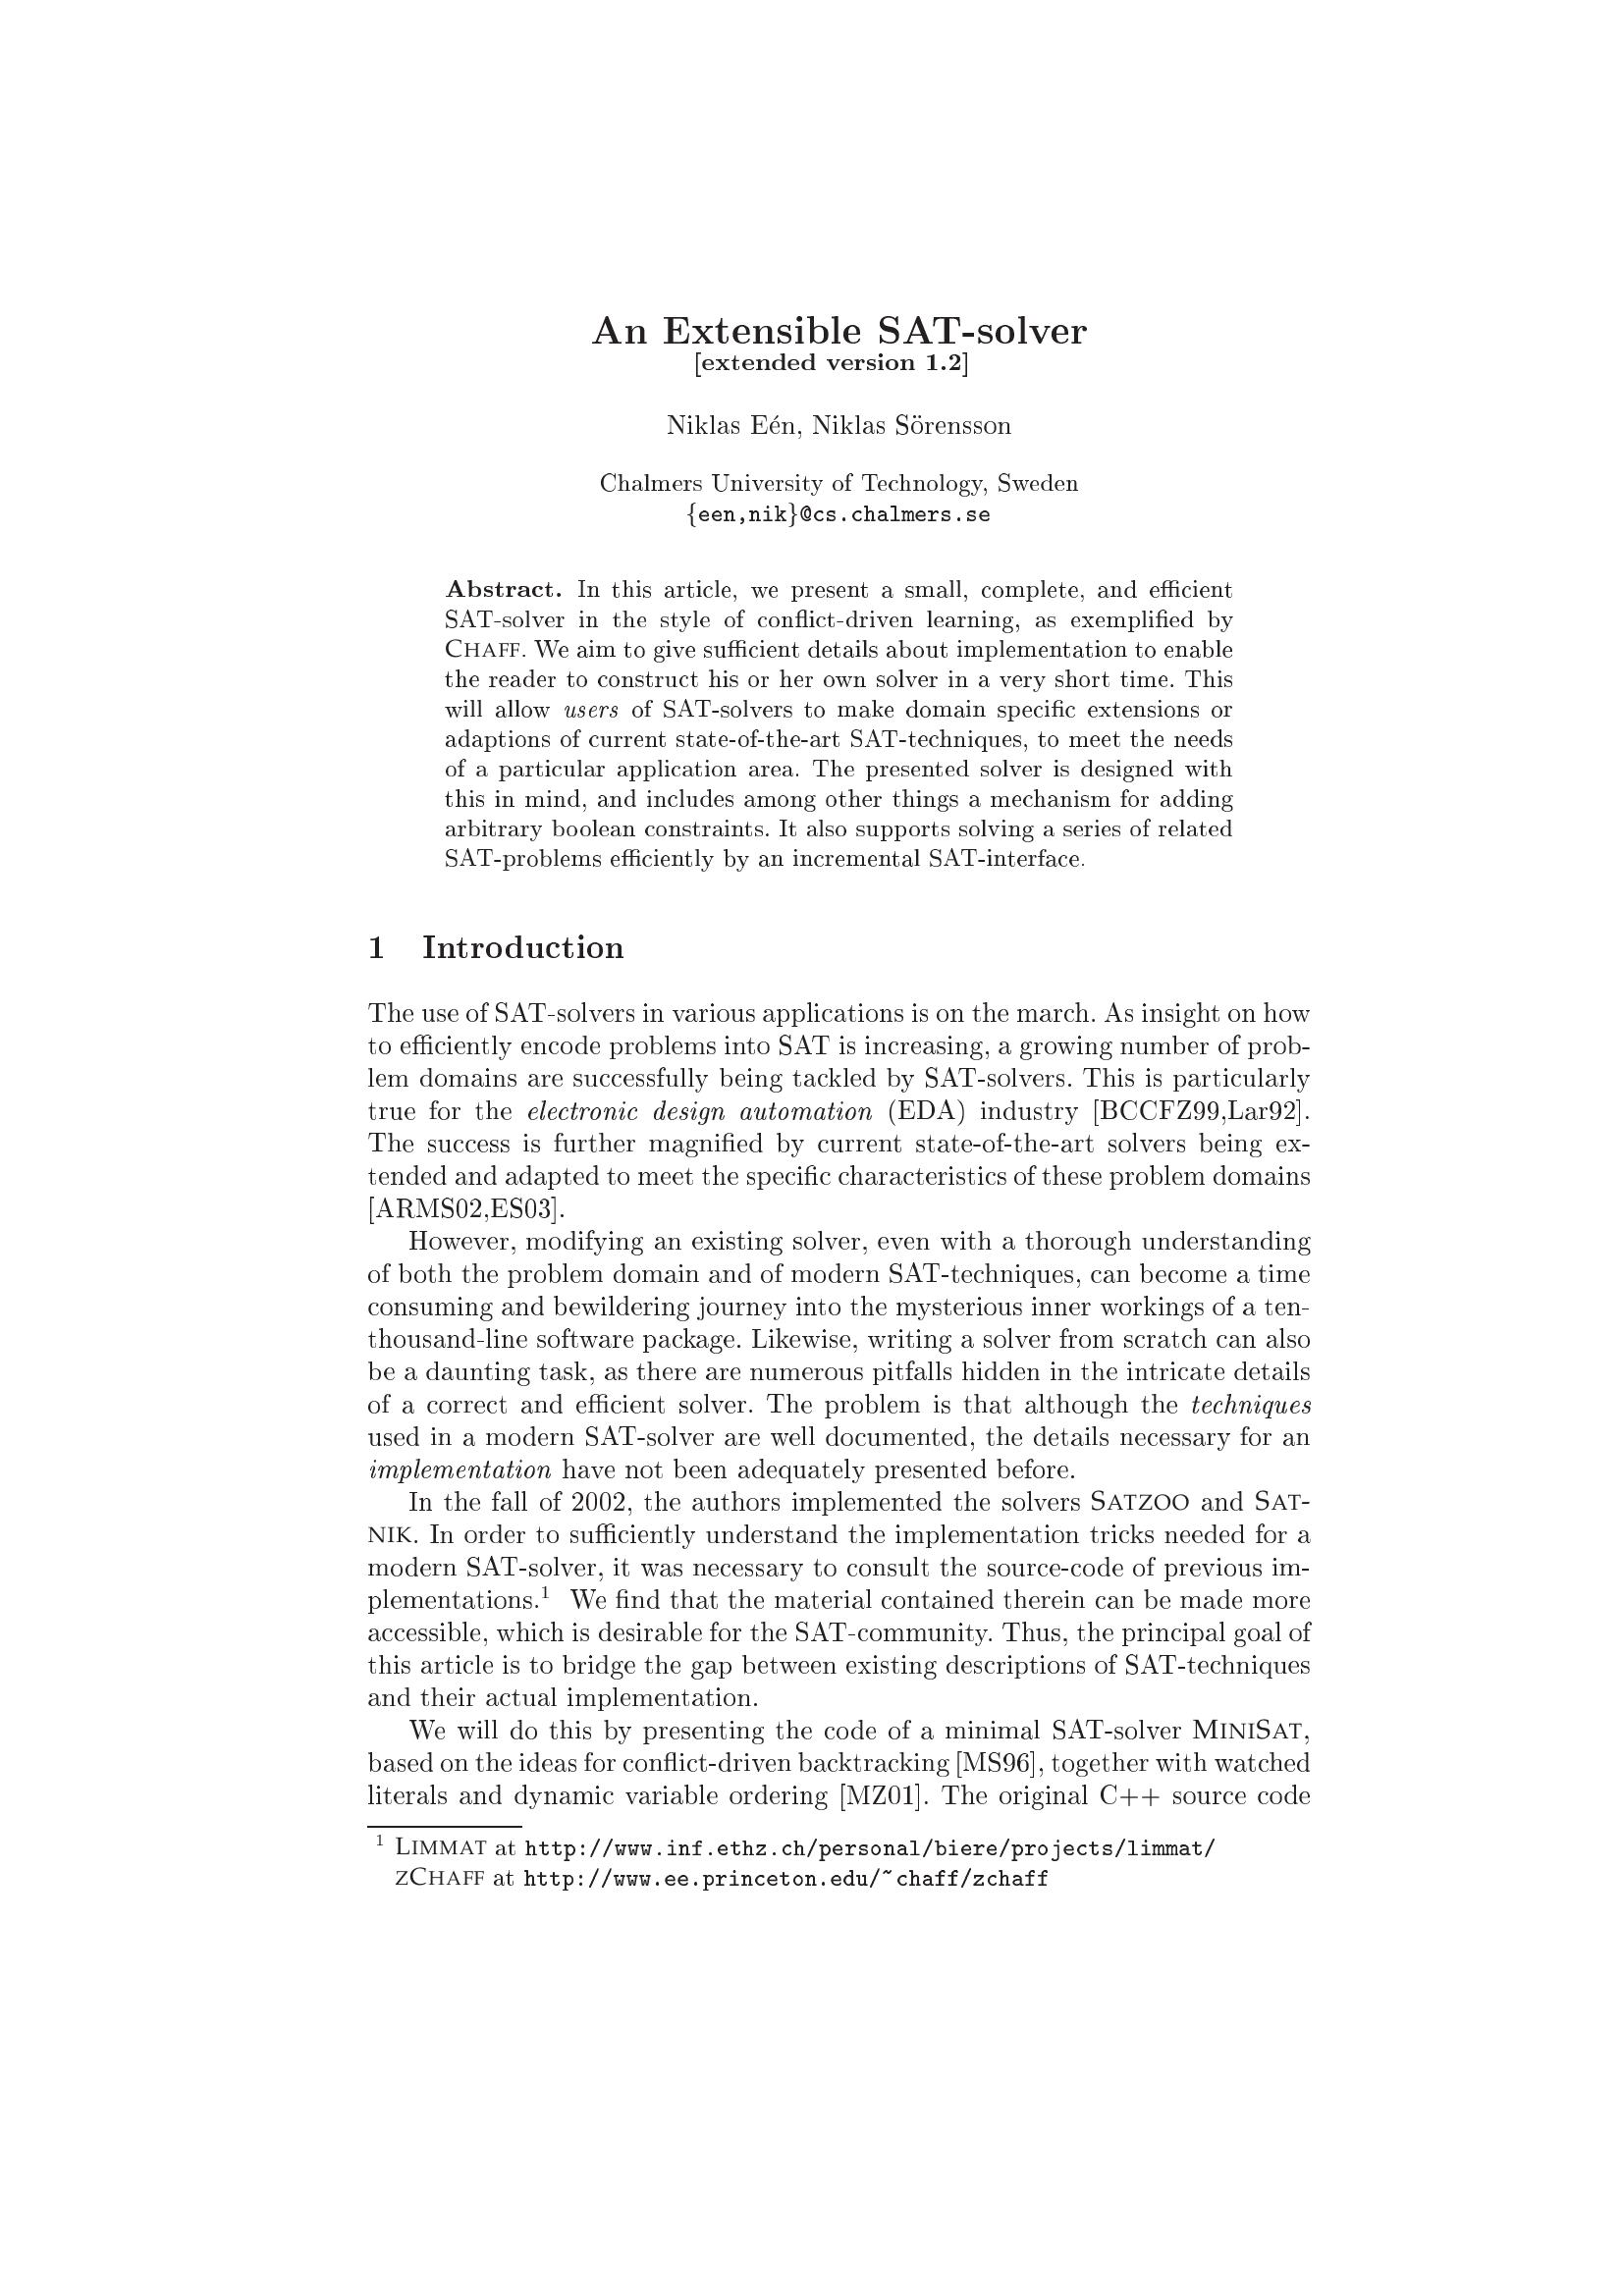

In [ ]:
img = cv2.imread('/content/page0.jpg')
cv2_imshow(img)

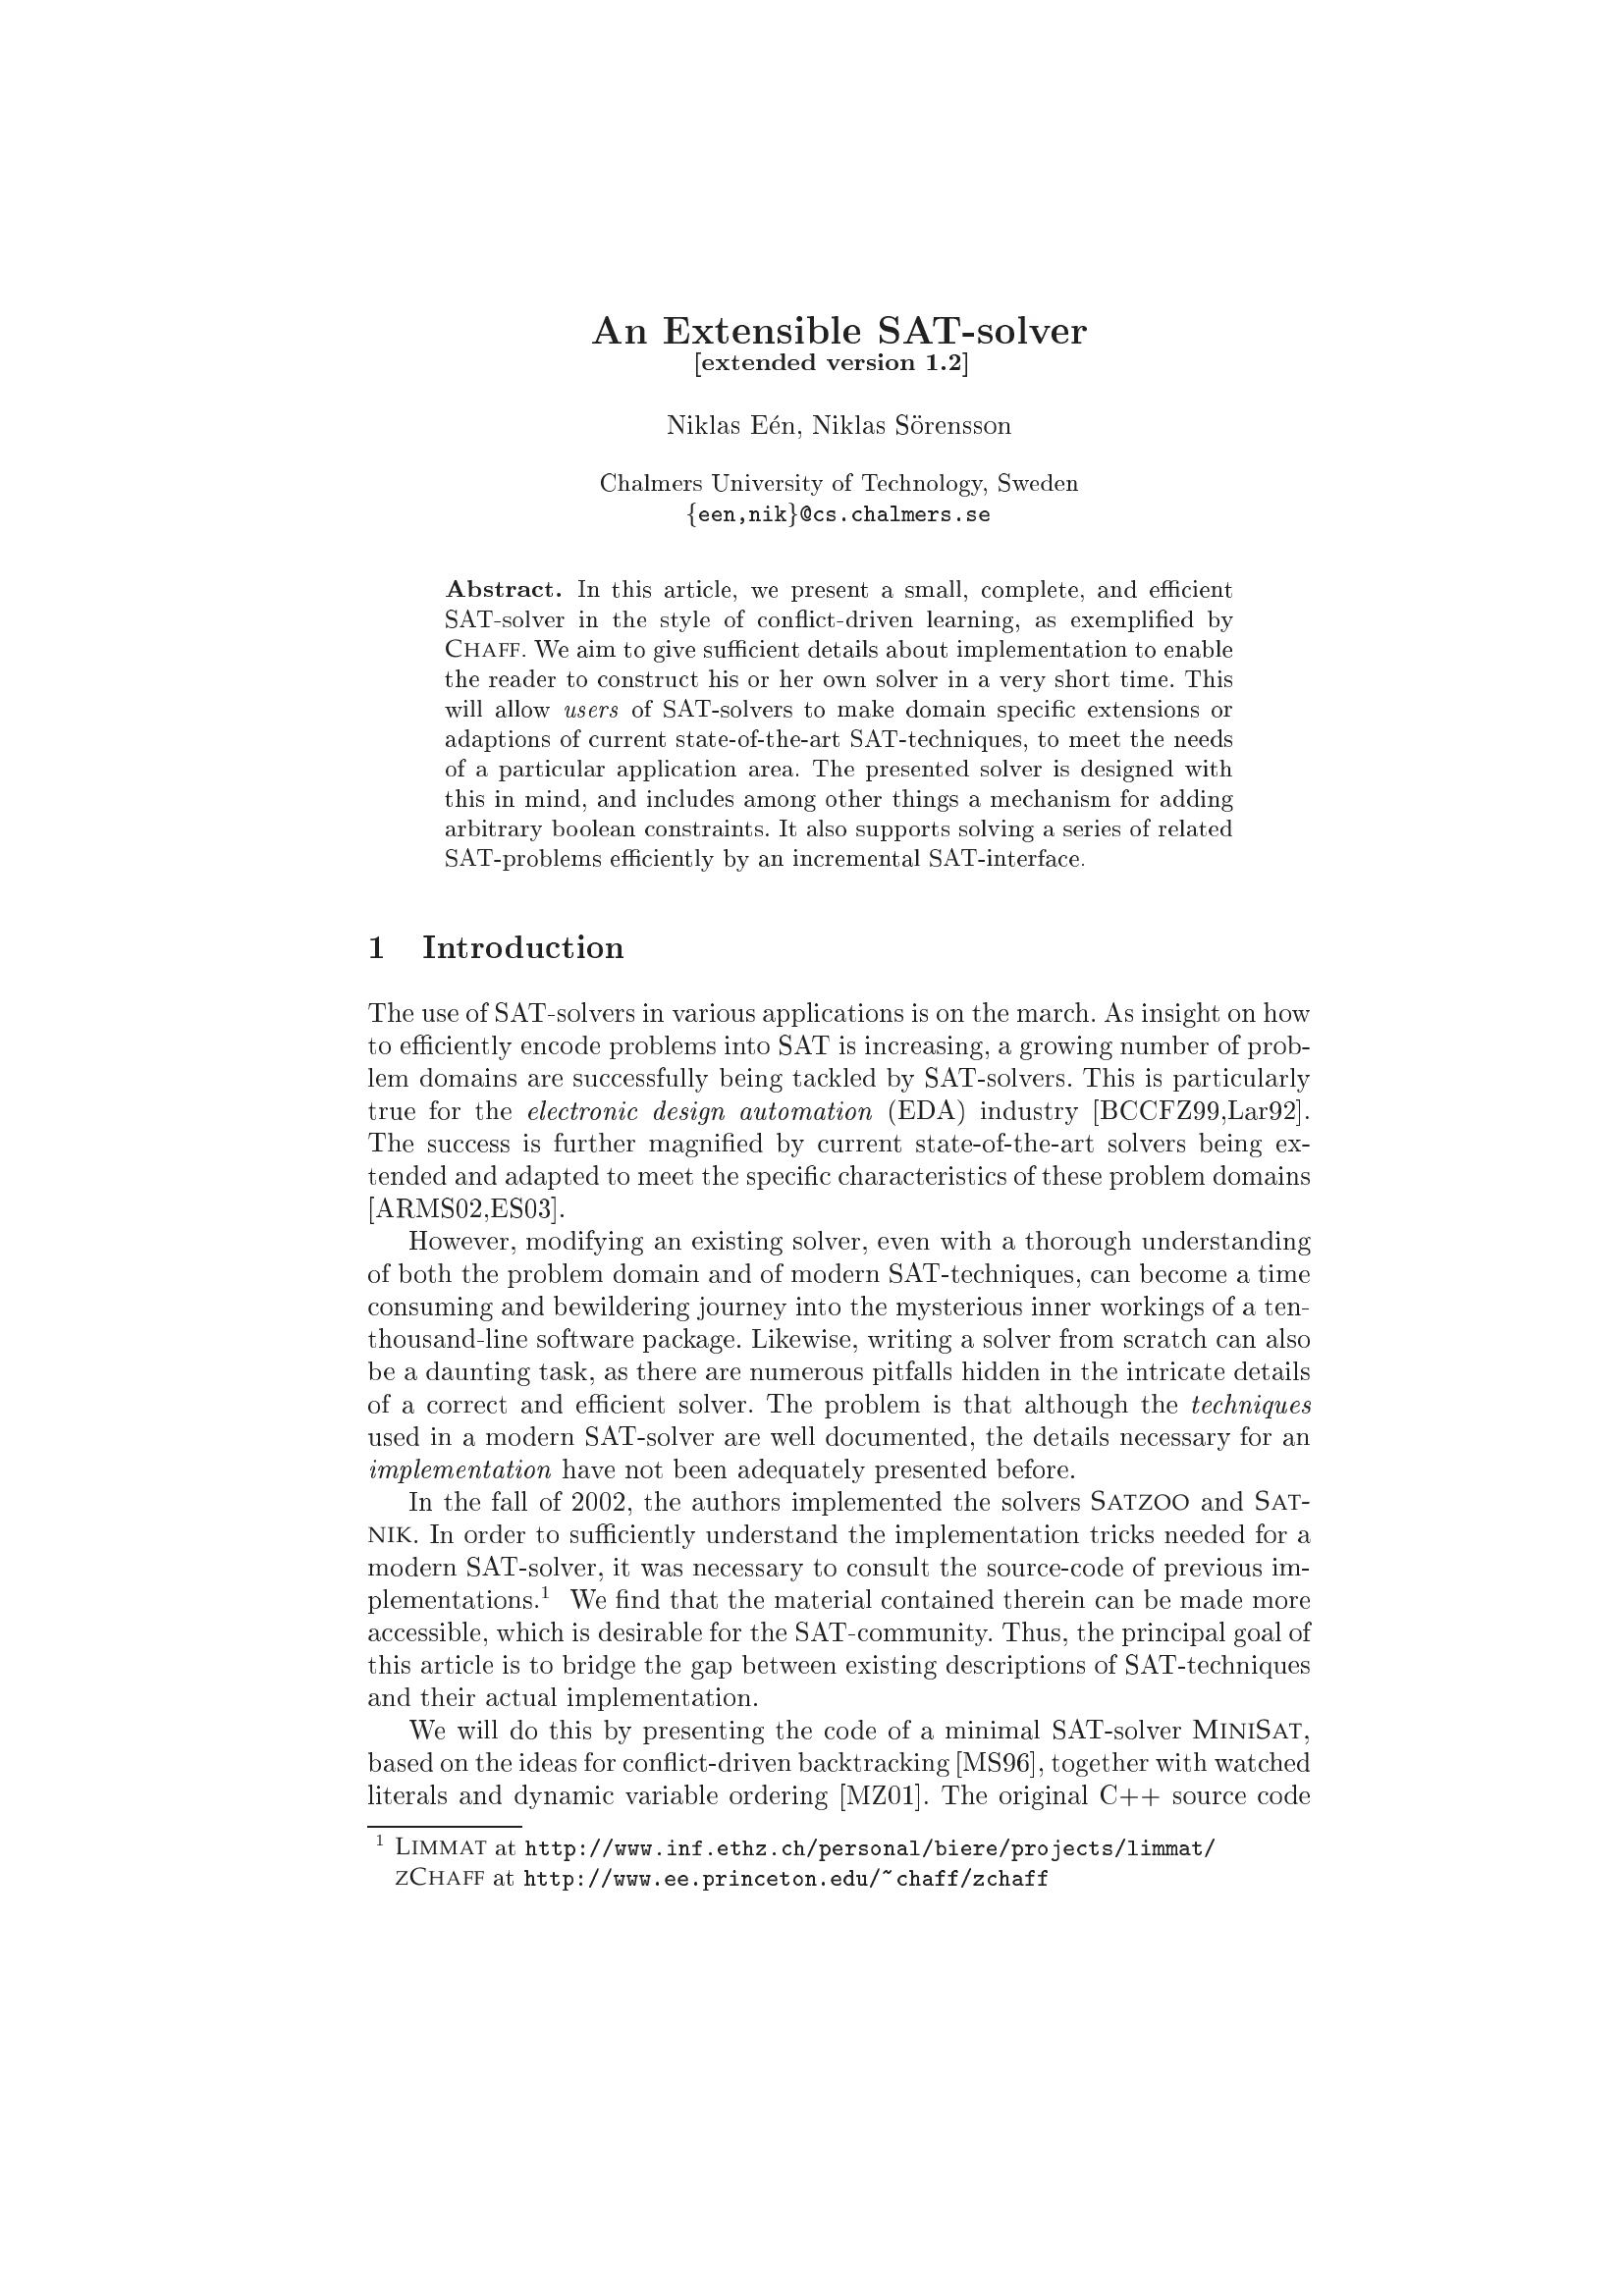

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

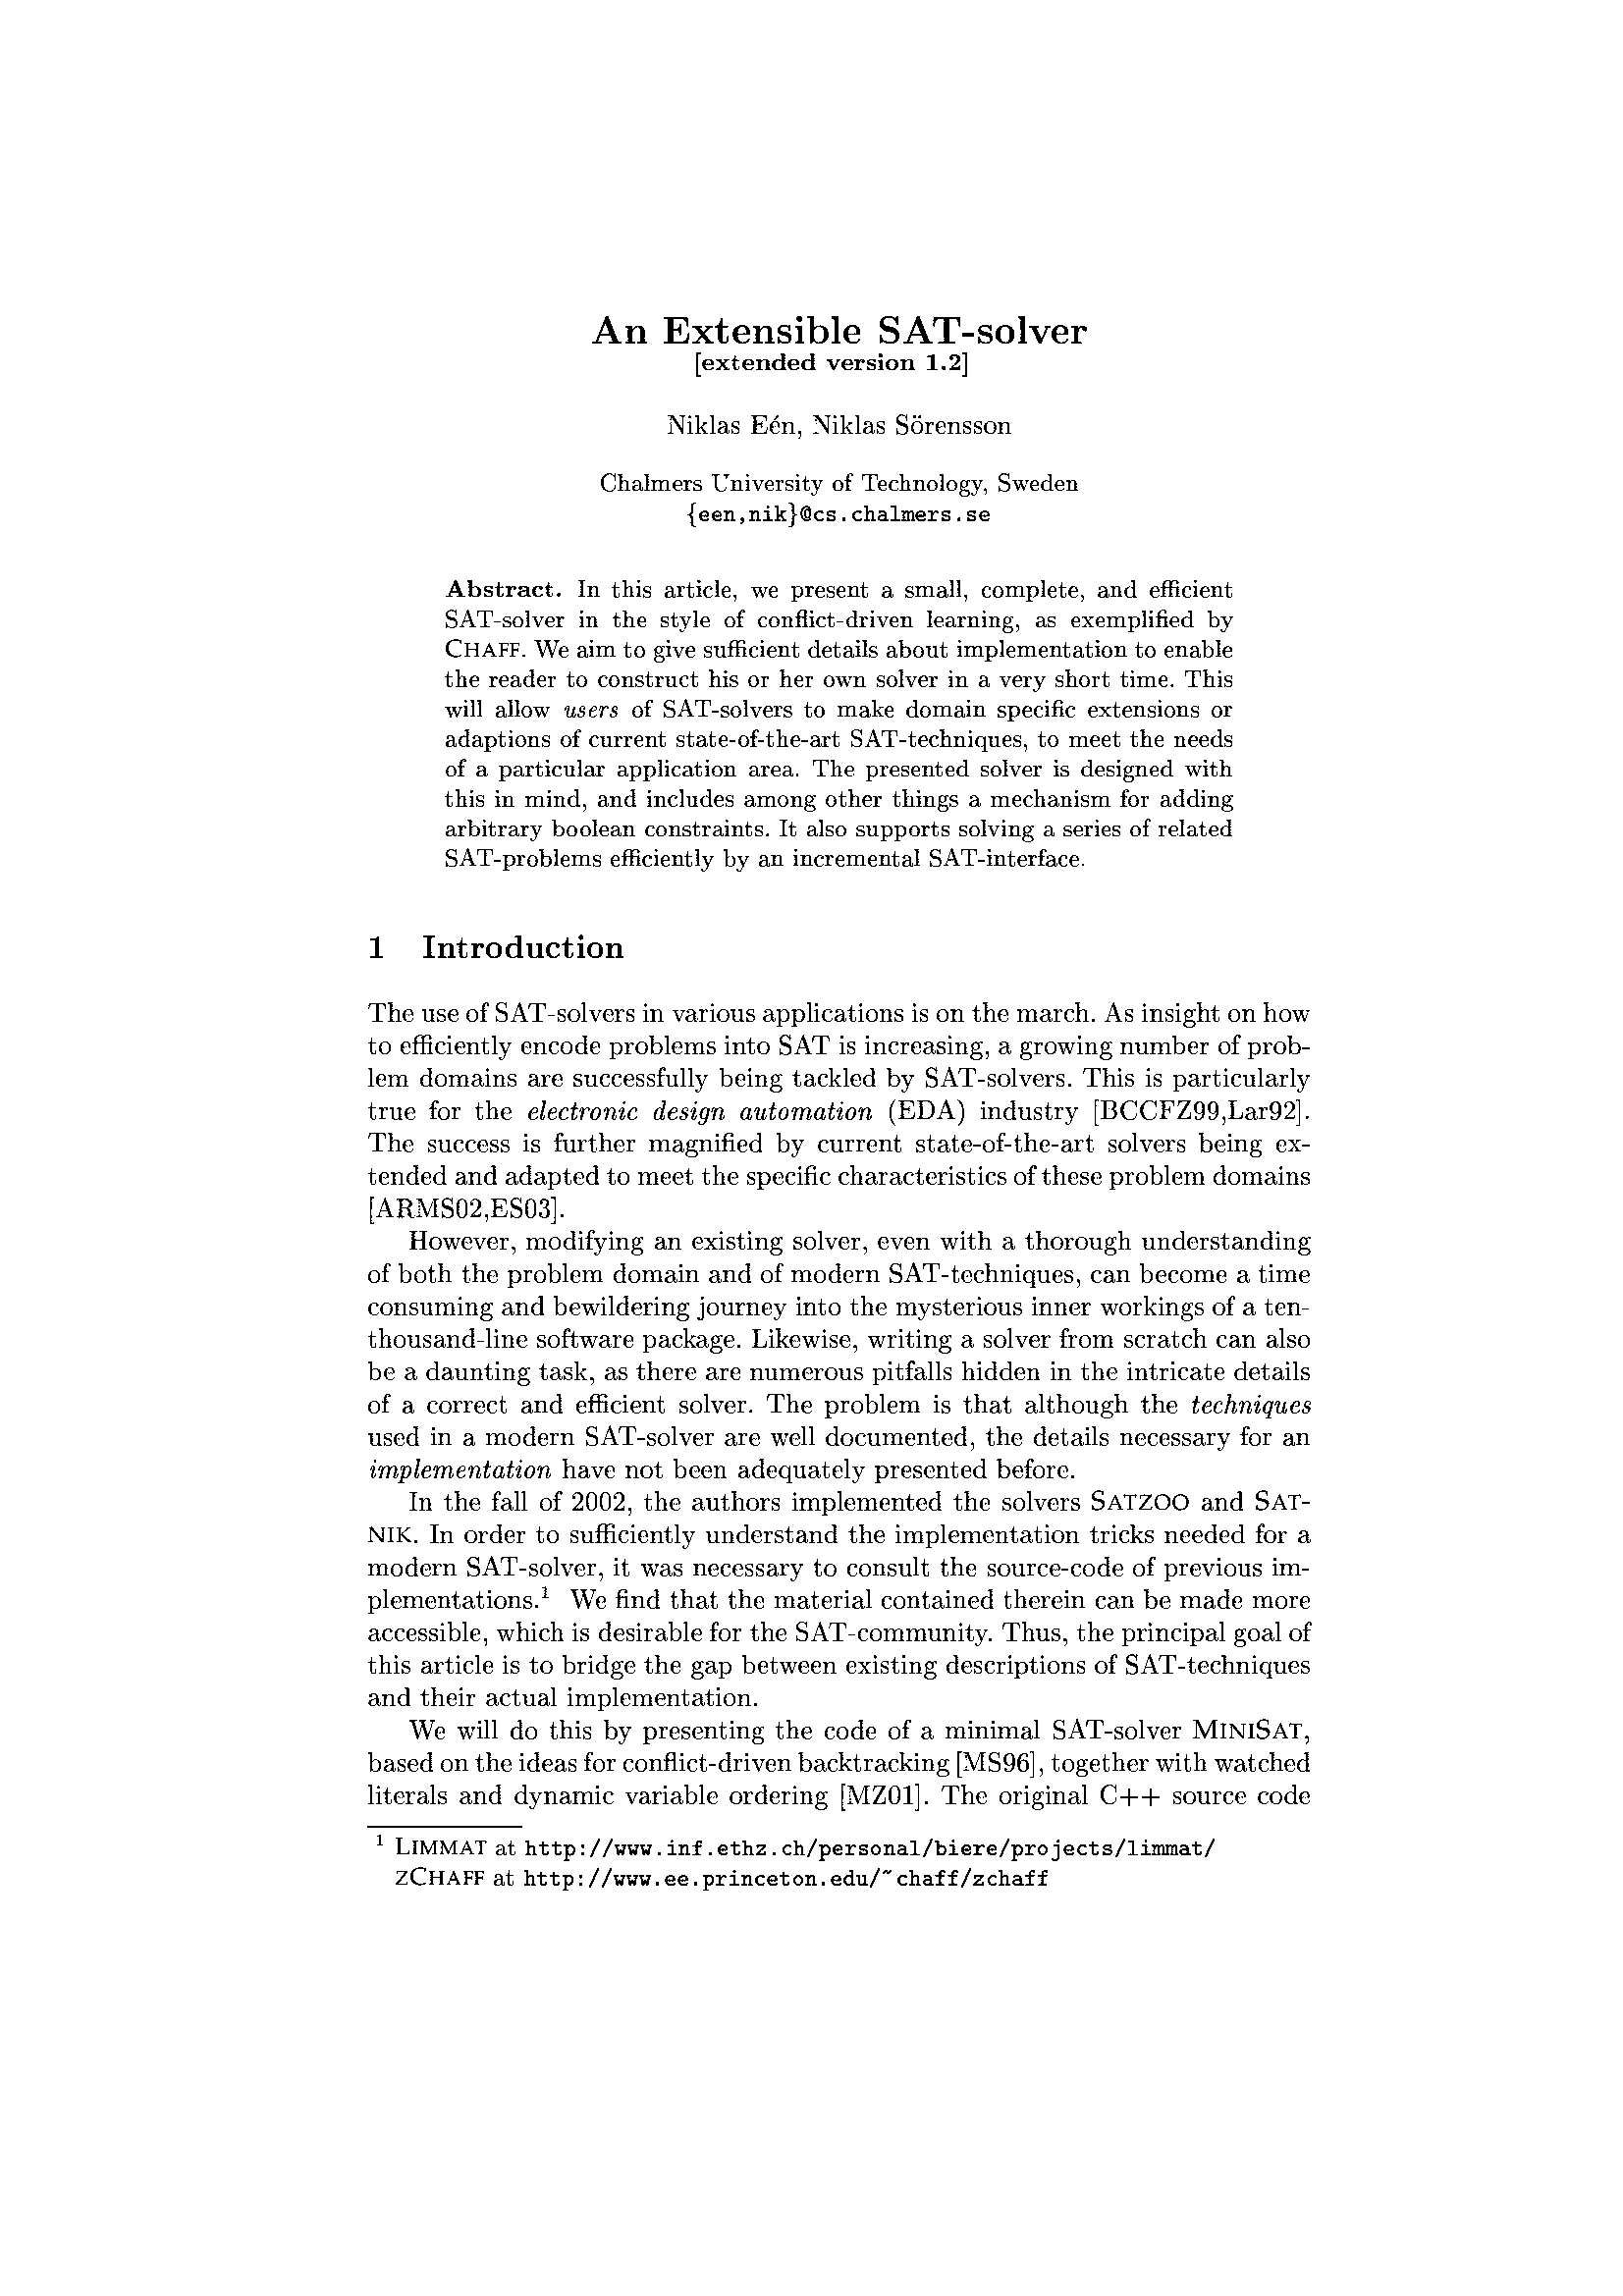

180.0


In [ ]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
print(val)

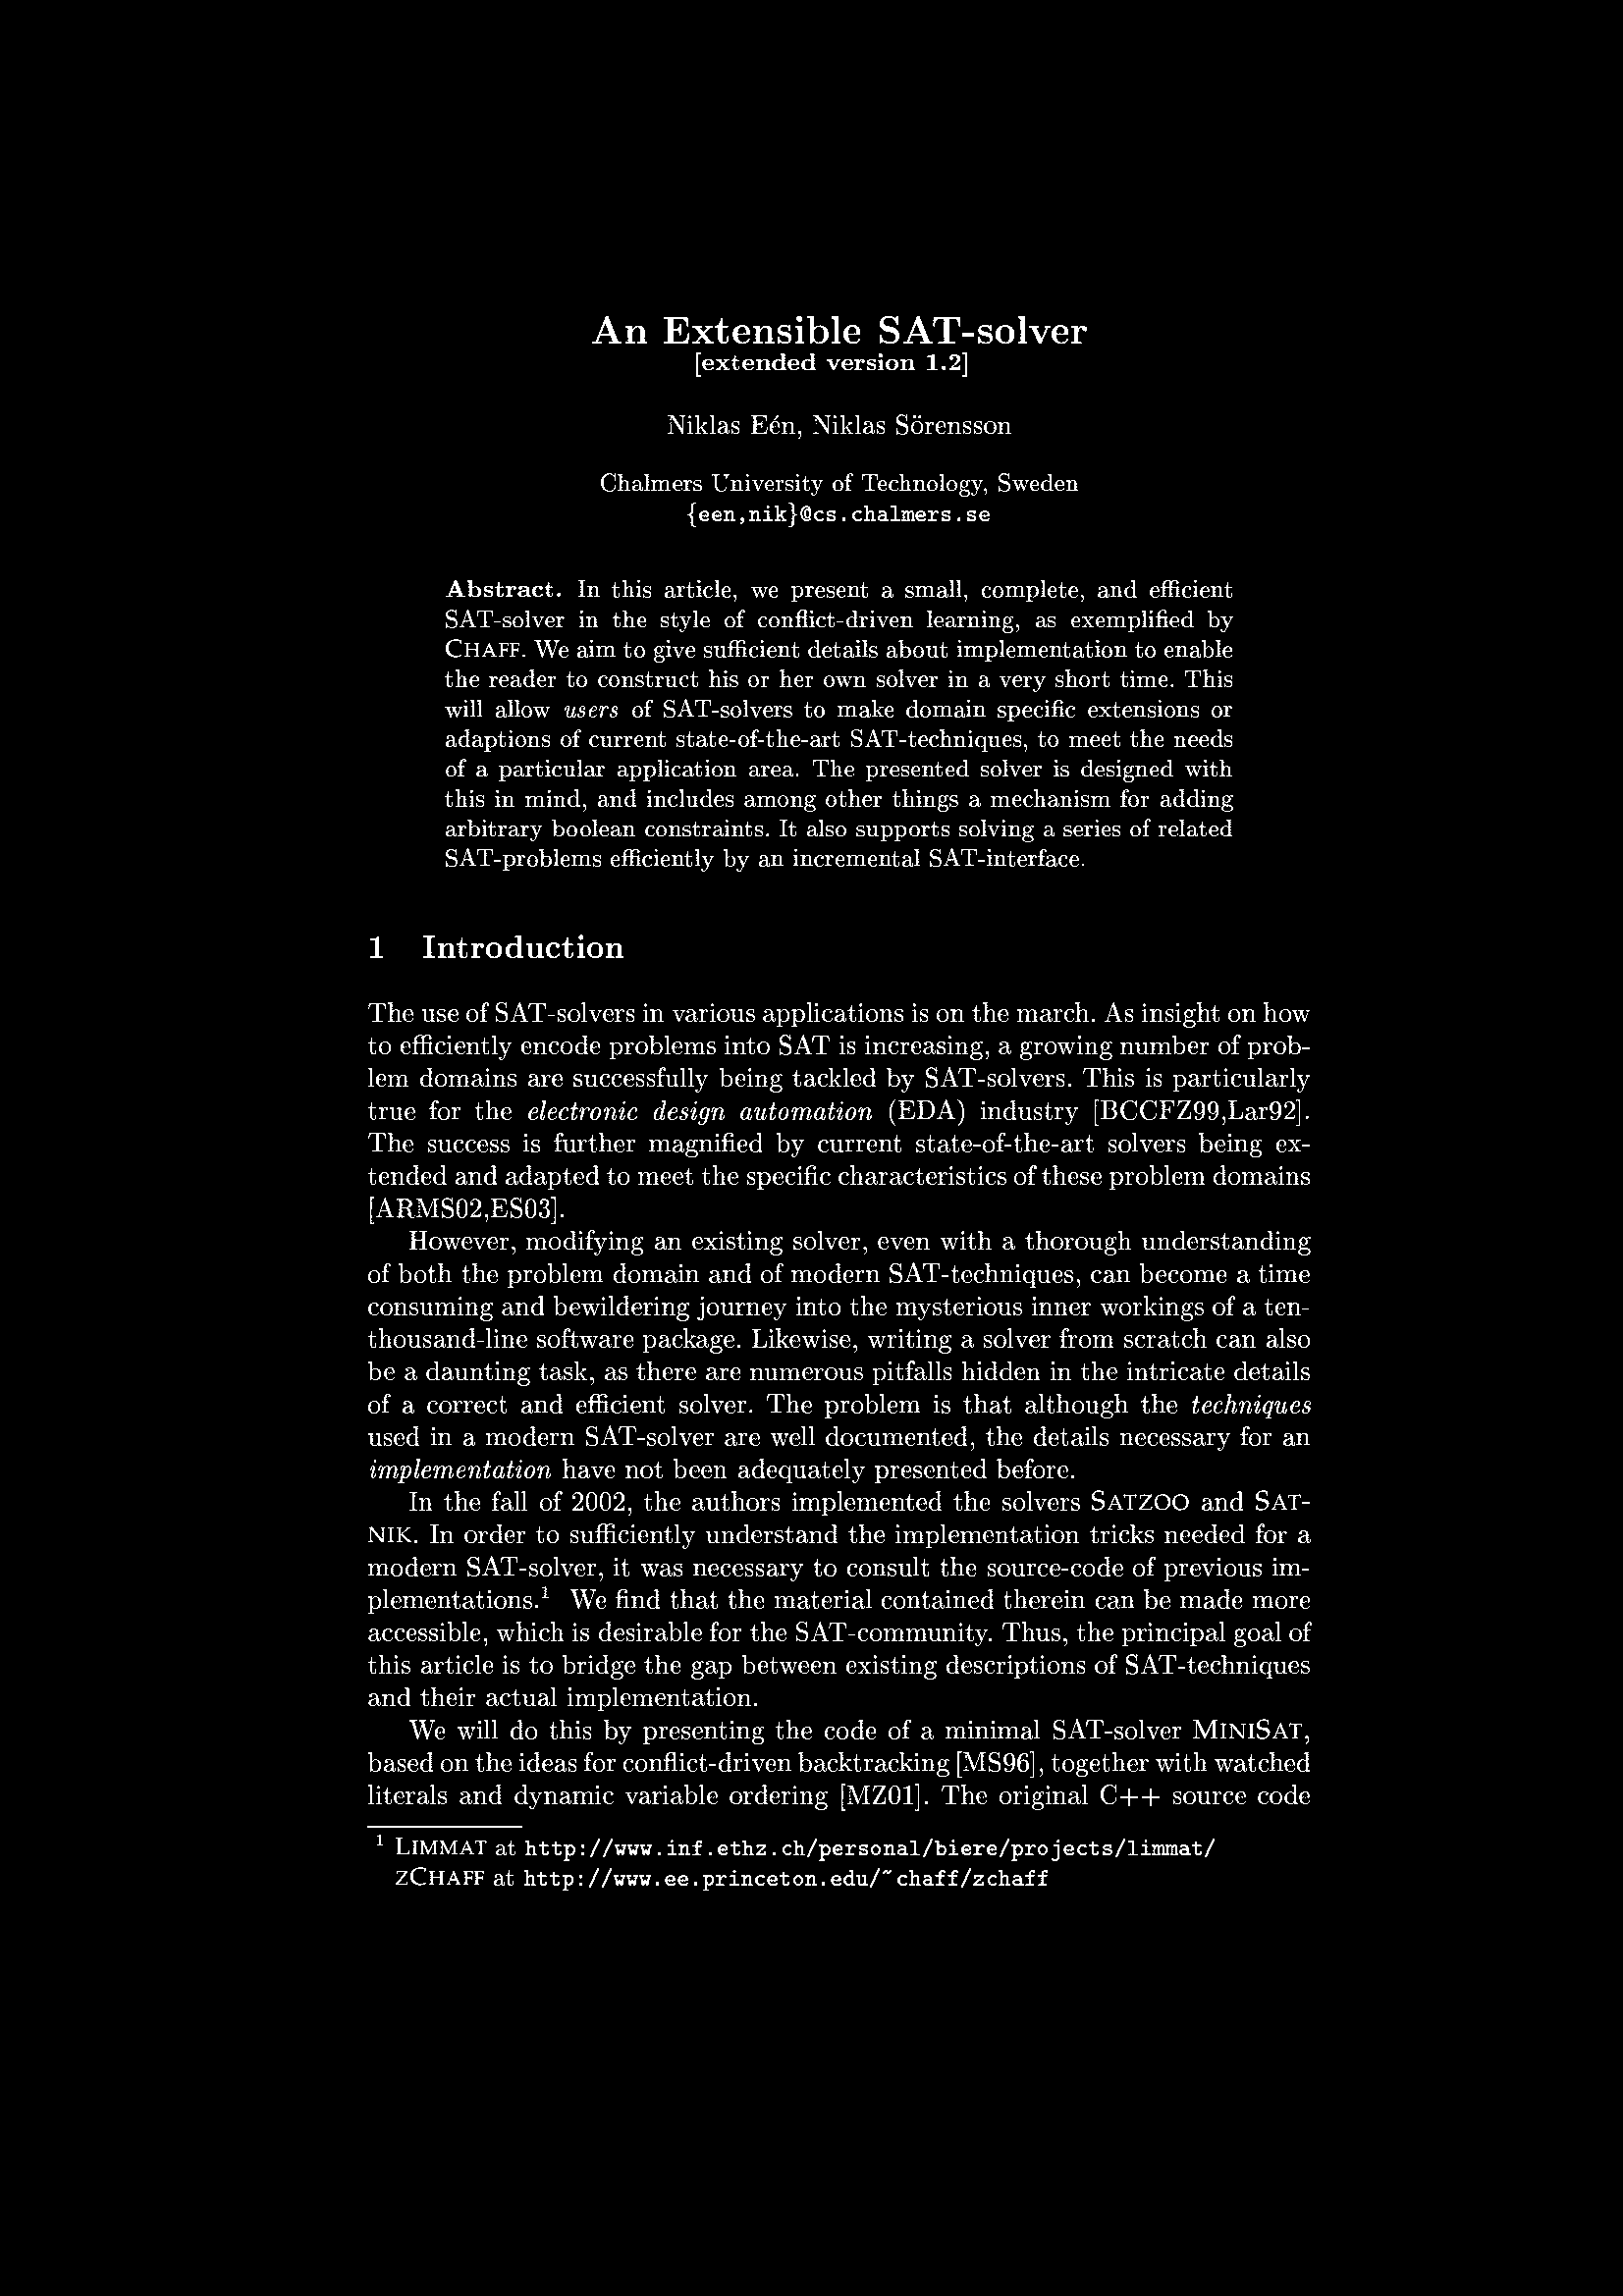

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto=pytesseract.image_to_string(thresh, lang='eng', config=config_tesseract)

output_file_path = 'output_text.txt'
with open(output_file_path, 'w') as file:
    file.write(texto)

print(f'Resultado salvo no arquivo "{output_file_path}"')

Resultado salvo no arquivo "output_text.txt"


In [ ]:
#lendo o arquivo.txt em inglês
arquivo = open("output_text.txt", "r")
conteudo = arquivo.read()
print(conteudo)
arquivo.close()


An Extensible SAT-solver

[extended version 1.2]

Niklas Eén, Niklas Strensson

Chalmers University of Technology, Sweden
{een,nik}@cs.chalmers.se

Abstract. In this article, we present a small, complete, and efficient
SAT-solver in the style of conflict-driven learning, as exemplified by
CHAFF. We aim to give sufficient details about implementation to enable
the reader to construct his or her own solver in a very short time. This
will allow users of SAT-solvers to make domain specific extensions or
adaptions of current state-of-the-art SAT-techniques, to meet the needs
of a particular application area. The presented solver is designed with
this in mind, and includes among other things a mechanism for adding
arbitrary boolean constraints. It also supports solving a series of related
SAT-problems efficiently by an incremental SAT-interface.

1 Introduction

The use of SAT-solvers in various applications is on the march. As insight on how
to efficiently encode problems into SAT is increa

In [ ]:
!pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
from deep_translator import GoogleTranslator

tradutor = GoogleTranslator(source="english", target="portuguese")
arquivo = open("output_text.txt", "r")
conteudo = arquivo.read()
print(conteudo)
arquivo.close()

# Dividindo o texto em pedaços de menos de 5.000 caracteres
caracteres_size = 4500
text_caracteres = [conteudo[i:i+caracteres_size] for i in range(0, len(conteudo), caracteres_size)]

# Traduza cada pedaço e combine os resultados
traducao = ""
for fatias in text_caracteres:
    traducao += tradutor.translate(fatias)

print(traducao)

An Extensible SAT-solver

[extended version 1.2]

Niklas Eén, Niklas Strensson

Chalmers University of Technology, Sweden
{een,nik}@cs.chalmers.se

Abstract. In this article, we present a small, complete, and efficient
SAT-solver in the style of conflict-driven learning, as exemplified by
CHAFF. We aim to give sufficient details about implementation to enable
the reader to construct his or her own solver in a very short time. This
will allow users of SAT-solvers to make domain specific extensions or
adaptions of current state-of-the-art SAT-techniques, to meet the needs
of a particular application area. The presented solver is designed with
this in mind, and includes among other things a mechanism for adding
arbitrary boolean constraints. It also supports solving a series of related
SAT-problems efficiently by an incremental SAT-interface.

1 Introduction

The use of SAT-solvers in various applications is on the march. As insight on how
to efficiently encode problems into SAT is increa